In [1]:
from sklearn.ensemble import AdaBoostClassifier


AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm=’SAMME.R’, random_state=None) 

1. base_estimator：代表的是弱分类器。在 AdaBoost 的分类器和回归器中都有这个参数，在 AdaBoost 中默认使用的是决策树，一般我们不需要修改这个参数，当然你也可以指定具体的分类器。

2. n_estimators：算法的最大迭代次数，也是分类器的个数，每一次迭代都会引入一个新的弱分类器来增加原有的分类器的组合能力。默认是 50。

3. learning_rate：代表学习率，取值在 0-1 之间，默认是 1.0。如果学习率较小，就需要比较多的迭代次数才能收敛，也就是说学习率和迭代次数是有相关性的。当你调整 learning_rate 的时候，往往也需要调整 n_estimators 这个参数。

在机器学习中，学习率（learning rate）是一个用于控制模型在训练过程中参数更新步长的重要超参数。学习率决定了我们在优化算法（例如梯度下降）中更新模型权重的速度或步长。

简单来说，如果学习率设置得太高，模型可能会在最优解周围震荡，或者甚至错过最优解。反之，如果学习率设置得太低，模型可能需要花费很长时间来收敛到最优解，或者可能会陷入局部最优解。

因此，选择一个合适的学习率非常关键。有多种策略可以用来选择和调整学习率，包括固定学习率、动态调整学习率（如学习率衰减）、以及使用自适应学习率方法（如Adam优化器等）。

4. algorithm：代表我们要采用哪种 boosting 算法，一共有两种选择：SAMME 和 SAMME.R。默认是 SAMME.R。这两者之间的区别在于对弱分类权重的计算方式不同。

5. random_state：代表随机数种子的设置，默认是 None。随机种子是用来控制随机模式的，当随机种子取了一个值，也就确定了一种随机规则，其他人取这个值可以得到同样的结果。如果不设置随机种子，每次得到的随机数也就不同。

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# from sklearn.datasets import load_boston
from sklearn.datasets import fetch_california_housing

from sklearn.ensemble import AdaBoostRegressor
# 加载数据
data=fetch_california_housing()
# 分割数据
train_x, test_x, train_y, test_y = train_test_split(data.data, data.target, test_size=0.25, random_state=33)
# 使用 AdaBoost 回归模型
regressor=AdaBoostRegressor()
regressor.fit(train_x,train_y)
pred_y = regressor.predict(test_x)
mse = mean_squared_error(test_y, pred_y)
print(" 房价预测结果 ", pred_y)
print(" 均方误差 = ",round(mse,2))

 房价预测结果  [3.47141971 1.46287022 3.12600972 ... 3.33316967 2.61846717 1.46287022]
 均方误差 =  0.71


In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# 使用决策树回归模型
dec_regressor=DecisionTreeRegressor()
dec_regressor.fit(train_x,train_y)
pred_y = dec_regressor.predict(test_x)
mse = mean_squared_error(test_y, pred_y)
print(" 决策树均方误差 = ",round(mse,2))
# 使用 KNN 回归模型
knn_regressor=KNeighborsRegressor()
knn_regressor.fit(train_x,train_y)
pred_y = knn_regressor.predict(test_x)
mse = mean_squared_error(test_y, pred_y)
print("KNN 均方误差 = ",round(mse,2))

 决策树均方误差 =  0.53
KNN 均方误差 =  1.17


/Users/haoyuexu/opt/anaconda3/envs/datamining/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-ser

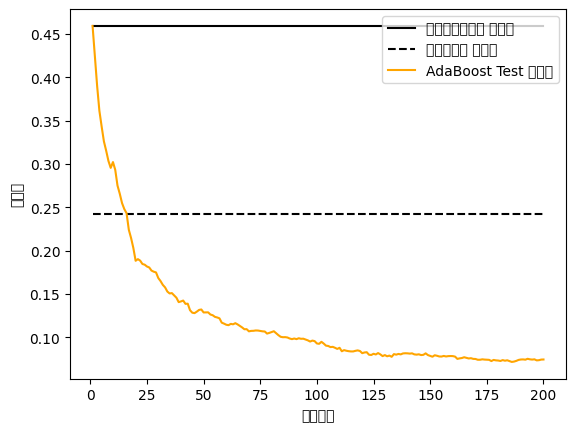

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import zero_one_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  AdaBoostClassifier

# 设置 AdaBoost 迭代次数
n_estimators=200
# 使用
X,y=datasets.make_hastie_10_2(n_samples=12000,random_state=1)
# 从 12000 个数据中取前 2000 行作为测试集，其余作为训练集
test_x, test_y = X[2000:],y[2000:]
train_x, train_y = X[:2000],y[:2000]
# 弱分类器
dt_stump = DecisionTreeClassifier(max_depth=1,min_samples_leaf=1)
dt_stump.fit(train_x, train_y)
dt_stump_err = 1.0-dt_stump.score(test_x, test_y)
# 决策树分类器
dt = DecisionTreeClassifier()
dt.fit(train_x,  train_y)
dt_err = 1.0-dt.score(test_x, test_y)
# AdaBoost 分类器
ada = AdaBoostClassifier(base_estimator=dt_stump,n_estimators=n_estimators)
ada.fit(train_x,  train_y)
# 三个分类器的错误率可视化
fig = plt.figure()
# 设置 plt 正确显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']

ax = fig.add_subplot(111)
ax.plot([1,n_estimators],[dt_stump_err]*2, 'k-', label=u'决策树弱分类器 错误率')
ax.plot([1,n_estimators],[dt_err]*2,'k--', label=u'决策树模型 错误率')
ada_err = np.zeros((n_estimators,))
# 遍历每次迭代的结果 i 为迭代次数, pred_y 为预测结果
for i,pred_y in enumerate(ada.staged_predict(test_x)):
     # 统计错误率
    ada_err[i]=zero_one_loss(pred_y, test_y)
# 绘制每次迭代的 AdaBoost 错误率 
ax.plot(np.arange(n_estimators)+1, ada_err, label='AdaBoost Test 错误率', color='orange')
ax.set_xlabel('迭代次数')
ax.set_ylabel('错误率')
leg=ax.legend(loc='upper right',fancybox=True)
plt.show()